<a href="https://www.kaggle.com/code/yorkyong/introduction-to-bayesian-learning?scriptVersionId=158454349" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://miro.medium.com/v2/0*oto_eQkxwpR5xKMH.png) 

#image from: https://medium.com/@priyankaparashar54/naive-bayes-classifier-and-its-mathematical-implementation-97b63cea9fd

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

Following up from my post (https://www.kaggle.com/discussions/questions-and-answers/466795) in Q&A to vlarify on Bayesian learning, I thought it will be useful to prepare a notebook to teach myself (and maybe others) with the consolidated findings about Bayesian learnings here. Feel free to review this notebook and give me your feedback and comments if it is useful or if there are areas to improve. Cheers!

### <b><span style='color:#FFCE30'> 1.1 |</span> Bayesian Learning in a nutshell</b>
- At its core, Bayesian Learning is an approach to machine learning that leverages Bayesian statistics to model and update uncertainty. 
- Unlike frequentist approaches, where parameters are considered fixed and estimated based on observed data (as in Maximum Likelihood Estimation or MLE), Bayesian Learning treats parameters as probability distributions. 
- It continuously updates these distributions as new data becomes available.

### <b><span style='color:#FFCE30'> 1.2 |</span> Maximum Likelihood Estimation (MLE)</b>
* MLE is a frequentist method that seeks to find the parameter values that maximize the likelihood of the observed data.
* In Bayesian Learning, MLE is often used as a point estimate for the parameters before incorporating any prior knowledge.

Mathematically, let's denote:
* Let  $\mathbf{\theta}$  represent the parameters of the distribution (e.g., mean, standard deviation).
* Let $\mathbf{X} = \{x_1, x_2, \ldots, x_n\}$  represent the observed sample.

### Likelihood function
* The likelihood function,  $\mathbf{P(X \mid \theta)}$,  represents the probability of observing the given sample for different values of  $\mathbf{\theta}$.  
* MLE seeks to find the values of  $\mathbf{\theta}$  that maximize this likelihood function.
* The likelihood function is often expressed as the product of the probability density function (pdf) or probability mass function (pmf) values for each data point:

$$
\mathbf{P(X \mid \theta) = \prod_{i=1}^{n} f(x_i \mid \theta)}
$$

Where, 

$
\mathbf{P(X \mid \theta)}
$ = probability of observing the given sample $\mathbf{X}$ for different values of $\mathbf{\theta}$ (or Likelihood)

$
\mathbf{\prod_{i=1}^{n}}
$ = denotes the product of a sequence of terms. In this case, it represents the product of terms where $\mathbf{i}$ varies from 1 to $\mathbf{n}$. 

$
\mathbf{f(x_i \mid \theta)}
$ = denotes the probability density function (pdf) or probability mass function (pmf) evaluated at a specific data point $\mathbf{x_i}$ for a statistical distribution with parameters 
$\mathbf{\theta}$. The symbol $\mathbf{f}$ represents the probability density function for continuous distributions or the probability mass function for discrete distributions.

### Goal of MLE
* The goal of MLE is to find the $\mathbf{\hat{\theta}_{\text{MLE}}}$ that maximizes this product (i.e. likelihood), which can be expressed as:

$$
\mathbf{\hat{\theta}_{\text{MLE}} = \underset{\theta}{\arg\max} \, P(X \mid \theta)}
$$

* In some cases, it is more convenient to work with the log-likelihood  $\mathbf{\log P(X \mid \theta)}$ for computational reasons (for example when we mutliply likelihood together it gives a even smaller number)
* The MLE estimate can be found by maximizing the log-likelihood:


$$
\mathbf{\hat{\theta}_{\text{MLE}} = \underset{\theta}{\arg\max} \, \log P(X \mid \theta)}
$$

In summary, MLE aims to find the parameter values $\mathbf{\hat{\theta}_{\text{MLE}}}$  that maximize the likelihood of observing the given sample, capturing the most probable parameters for the underlying distribution.



### <b><span style='color:#FFCE30'> 1.3 |</span> Maximum A Posteriori (MAP)</b>
* Maximum A Posteriori (MAP) is an extension of MLE that incorporates prior information into parameter estimation.
* In Bayesian Learning, MAP is a natural fit as it combines prior beliefs, likelihood, and observed data to provide a more robust estimate of the parameters.

**Maximum A Posteriori (MAP) Estimation**

MAP estimation is a Bayesian approach to finding the most probable hypothesis or parameter values given the observed training data. It combines prior beliefs about the parameters with the likelihood of the data to form the posterior distribution. The goal is to maximize the posterior probability to obtain the most probable hypothesis.

Consider a hypothesis represented by parameters $\mathbf{\theta}$ and training data $\mathbf{X}$. The MAP estimate $\mathbf{\theta}_{\text{MAP}}$ is found by maximizing the posterior probability $\mathbf{\theta \mid X}$, which can be expressed using Bayes' Theorem:

$$ P(\theta \mid X) = \frac{P(X \mid \theta) \cdot P(\theta)}{P(X)} $$ 


- $P(\theta \mid X)$: Posterior probability, the probability of the hypothesis given the data.
- $P(X \mid \theta)$: Likelihood, the probability of the data given the hypothesis.
- $P(\theta)$: Prior probability, the initial belief about the distribution of parameters.
- $P(X)$: Marginal likelihood, the probability of observing the data.


The MAP estimate is obtained by maximizing the posterior probability:

$$ \hat{\theta}_{\text{MAP}} = \underset{\theta}{\arg\max} \, P(\theta \mid X) $$

In practice, it is often more convenient to work with the log-posterior $\log P(\theta \mid X)$ for computational reasons.

MAP estimation strikes a balance between the likelihood of the data and prior beliefs, providing a way to incorporate prior knowledge into the learning process.


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>LEARNING WITH EXAMPLE</b></div>

- Let's say you're predicting the weight of a fruit, and you have a prior belief that most fruits weigh between 100g and 200g. You start with this prior distribution. 
- As you collect data (observing the weights of various fruits), you update your beliefs about the weight distribution based on the observed data, resulting in a posterior distribution.
- In this example, MLE could give you a point estimate for the average weight based on the observed data alone. 
- However, Bayesian Learning, including MAP, allows you to continuously refine your estimate, considering both prior beliefs and new data, providing a more nuanced and probabilistic view of the parameter space.


Let's try to see this with some code and charts

### <b><span style='color:#FFCE30'> 2.1 |</span> Step 1: Prior Belief</b>
- In this step, we define our prior belief about the mean weight of fruits. 
- We assume that most fruits weigh between 100g and 200g, represented by a normal distribution with a mean of 150g and a standard deviation of 20g.

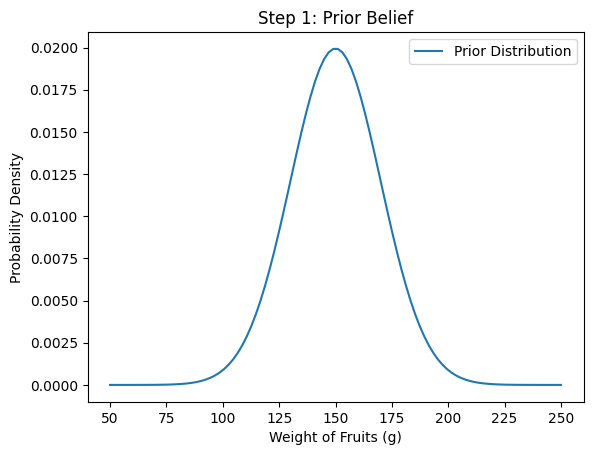

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Define Prior Belief
prior_mean = 150  # Prior belief about the mean weight of fruits
prior_std = 20    # Prior belief about the standard deviation

prior_distribution = norm(loc=prior_mean, scale=prior_std)

# Plot the prior distribution
x_range = np.linspace(50, 250, 100)
plt.plot(x_range, prior_distribution.pdf(x_range), label='Prior Distribution')
plt.title('Step 1: Prior Belief')
plt.xlabel('Weight of Fruits (g)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### <b><span style='color:#FFCE30'> 2.2 |</span> Step 2: Observe Data</b>
We observe the weights of specific fruits (our likelihood). In this example, we have observed five fruits with weights 155g, 148g, 162g, 142g, and 160g.

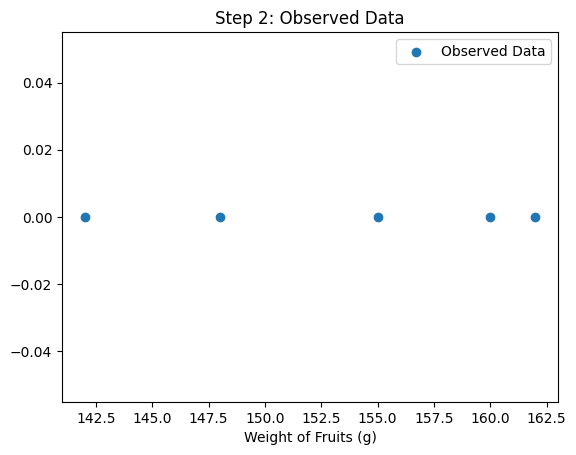

In [2]:
# Step 2: Observe Data
observed_data = np.array([155, 148, 162, 142, 160])

# Plot the observed data
plt.scatter(observed_data, np.zeros_like(observed_data), marker='o', label='Observed Data')
plt.title('Step 2: Observed Data')
plt.xlabel('Weight of Fruits (g)')
plt.legend()
plt.show()

### <b><span style='color:#FFCE30'> 2.3 |</span> Step 3: Maximum Likelihood Estimation (MLE)</b>
In this step, we calculate the Maximum Likelihood Estimate (MLE) based on the observed data. The MLE provides a point estimate for the average weight of fruits.

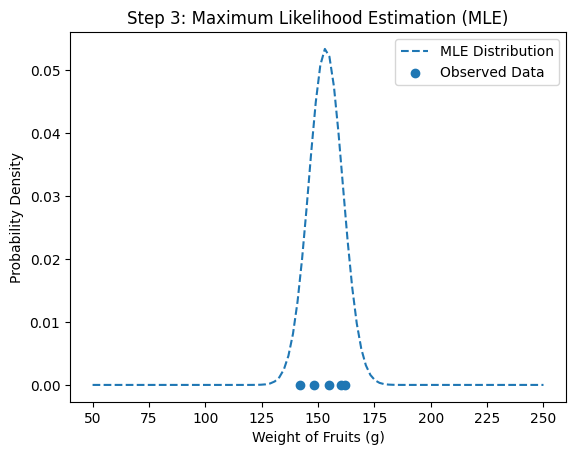

In [3]:
# Step 3: Maximum Likelihood Estimation (MLE)
mle_mean = np.mean(observed_data)
mle_std = np.std(observed_data)

# Plot the MLE distribution
plt.plot(x_range, norm.pdf(x_range, loc=mle_mean, scale=mle_std), label='MLE Distribution', linestyle='--')
plt.scatter(observed_data, np.zeros_like(observed_data), marker='o', label='Observed Data')
plt.title('Step 3: Maximum Likelihood Estimation (MLE)')
plt.xlabel('Weight of Fruits (g)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### <b><span style='color:#FFCE30'> 2.4 |</span> Step 4: Bayesian Update - Maximum A Posteriori (MAP)</b>
Now, we perform a Bayesian Update using Maximum A Posteriori (MAP). We combine our prior belief with the likelihood (assumed Gaussian with known variance) and the observed data to update our beliefs and obtain a posterior distribution.

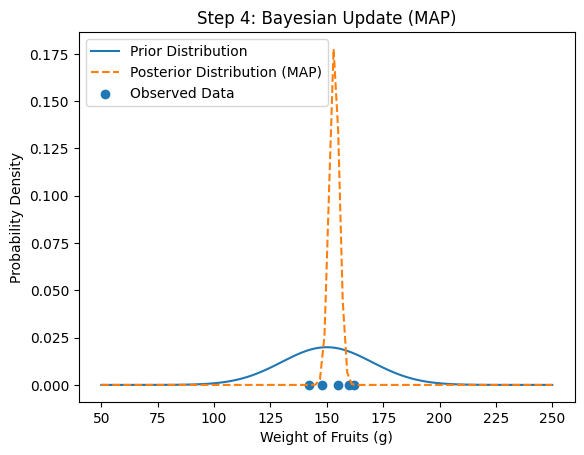

In [4]:
# Step 4: Bayesian Update (MAP)
likelihood_variance = 25  # Assumed variance of the likelihood

# Calculate MAP parameters
map_precision = 1.0 / (prior_std**2) + len(observed_data) / likelihood_variance
map_variance = 1.0 / map_precision
map_mean = (prior_mean / prior_std**2 + np.sum(observed_data) / likelihood_variance) * map_variance

map_distribution = norm(loc=map_mean, scale=np.sqrt(map_variance))

# Plot the posterior distribution (MAP)
plt.plot(x_range, prior_distribution.pdf(x_range), label='Prior Distribution')
plt.plot(x_range, map_distribution.pdf(x_range), label='Posterior Distribution (MAP)', linestyle='--')
plt.scatter(observed_data, np.zeros_like(observed_data), marker='o', label='Observed Data')
plt.title('Step 4: Bayesian Update (MAP)')
plt.xlabel('Weight of Fruits (g)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### <b><span style='color:#FFCE30'> 2.5 |</span> Step 5: Posterior Inference</b>
We can now make inferences based on the entire posterior distribution. In this case, we sample from the posterior distribution to visualize the possible values of the mean weight of fruits.

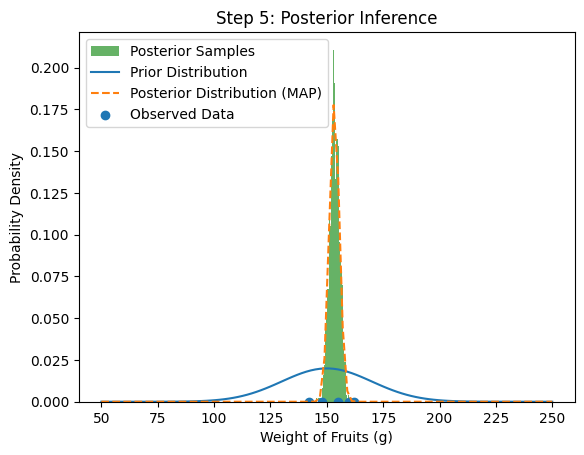

In [5]:
# Step 5: Posterior Inference
posterior_samples = np.random.normal(map_mean, np.sqrt(map_variance), size=1000)

# Plot the posterior samples
plt.hist(posterior_samples, bins=30, density=True, alpha=0.6, color='g', label='Posterior Samples')
plt.plot(x_range, prior_distribution.pdf(x_range), label='Prior Distribution')
plt.plot(x_range, map_distribution.pdf(x_range), label='Posterior Distribution (MAP)', linestyle='--')
plt.scatter(observed_data, np.zeros_like(observed_data), marker='o', label='Observed Data')
plt.title('Step 5: Posterior Inference')
plt.xlabel('Weight of Fruits (g)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

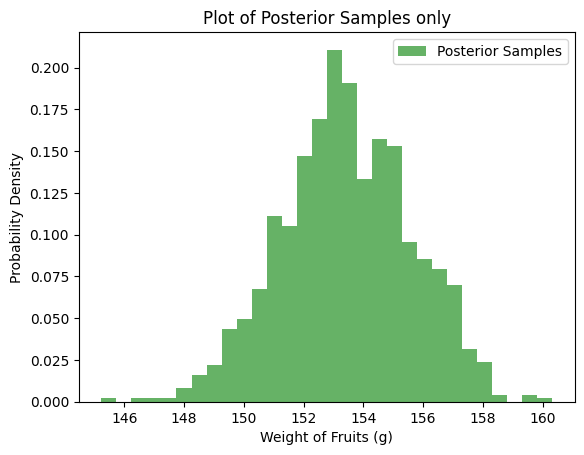

In [6]:
# Plot the posterior samples
plt.hist(posterior_samples, bins=30, density=True, alpha=0.6, color='g', label='Posterior Samples')
plt.title('Plot of Posterior Samples only')
plt.xlabel('Weight of Fruits (g)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### <b><span style='color:#FFCE30'> 2.6 |</span> MLE vs. MAP with Uniform Prior</b>
In this final step, we compare the MLE estimate with the MAP estimate. The MAP estimate incorporates our prior belief and converges to the MLE estimate when a uniform prior is used.

MLE: 
$$
\mathbf{\hat{\theta}_{\text{MLE}} = \underset{\theta}{\arg\max} \, P(X \mid \theta)}
$$

MAP:
$$ 
\hat{\theta}_{\text{MAP}} = \underset{\theta}{\arg\max} \, P(\theta \mid X) 
$$

For a uniform prior, i.e.

$$
p(\theta) = p(\theta') \quad \forall \theta, \theta' \in H 
$$

meaning that for the probability of event $\theta$ is equal to the probability of the complement event $\theta'$ for all possible paris of $\theta$ and $\theta'$ in the set $H$.

MAP will coincide with MLE since $P(\theta \mid X) \propto P(X \mid \theta)P(\theta)$


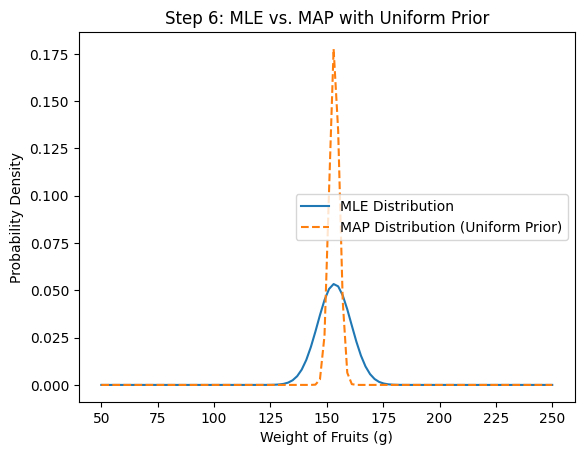

In [7]:
# Step 6: MLE vs. MAP with Uniform Prior
# Plot MLE and MAP distributions for comparison
plt.plot(x_range, norm.pdf(x_range, loc=mle_mean, scale=mle_std), label='MLE Distribution')
plt.plot(x_range, map_distribution.pdf(x_range), label='MAP Distribution (Uniform Prior)', linestyle='--')
plt.title('Step 6: MLE vs. MAP with Uniform Prior')
plt.xlabel('Weight of Fruits (g)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>ACKNOWLEDGEMENTS</b></div>
A special acknowledgment goes to ChatGPT, a powerful language model developed by OpenAI, for its invaluable assistance in generating explanations and providing insights throughout the creation of this notebook. ChatGPT played a crucial role in helping to articulate complex concepts and enhance the overall clarity of the content. Its capabilities in natural language processing greatly contributed to the quality of explanations provided in this notebook.


The following are also notebooks that I have referred to in the preparation of this notebook:

- Learn by example Expectation Maximization: https://www.kaggle.com/code/charel/learn-by-example-expectation-maximization
- Bayesian Learning Basics | Tutorial: https://www.kaggle.com/code/upadorprofzs/bayesian-learning-basics-tutorial
- Introduction to Bayesian Inference: https://www.kaggle.com/code/philippsinger/introduction-to-bayesian-inference
- Bayesian Regression | House Price Prediction: https://www.kaggle.com/code/shtrausslearning/bayesian-regression-house-price-prediction#6-%7C-DEFINING-A-CUSTOM-CLASS-ML-MODEL
- Naive Bayes with Hyperparameter Tuning: https://www.kaggle.com/code/akshaysharma001/naive-bayes-with-hyperpameter-tuning
- Naive Bayes Classifier in Python: https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python

I hope this notebook was useful to introduce the concept of Bayesian Learning. 
Feel free to leave an upvote or comment if you have some questions or feedback on the notebook.

![](https://i0.wp.com/degreesofcertainty.blog/wp-content/uploads/2019/04/052816_bayesian-opener_free.jpg?resize=860%2C460&ssl=1) 

image from: https://degreesofcertainty.blog/2019/04/17/my-favourite-theorem/